<a href="https://colab.research.google.com/github/sathish-1804/Mini_projects/blob/master/03_introduction_to_computer_vision_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Convolutional Neural Networks and Computer Vision

Computer Vision is the practice of writing algorithms which can discover patterns in visual data.

## Get the data

In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downl7oad file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2023-07-25 05:46:47--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.12.128, 172.217.194.128, 142.250.4.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.12.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  22.4MB/s    in 5.8s    

2023-07-25 05:46:54 (18.0 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [2]:
!ls pizza_steak

test  train


In [3]:
!ls pizza_steak/train

pizza  steak


In [4]:
!ls pizza_steak/train/pizza

1008104.jpg  1638227.jpg  2235981.jpg  2774899.jpg  3464027.jpg  576236.jpg
1008144.jpg  1646974.jpg  2236914.jpg  2775763.jpg  3464858.jpg  5764.jpg
1008844.jpg  1649108.jpg  2241448.jpg  2778214.jpg  3473991.jpg  579691.jpg
1008941.jpg  1649276.jpg  2247711.jpg  277963.jpg   3475936.jpg  593400.jpg
1011404.jpg  1652943.jpg  2253670.jpg  2785084.jpg  3478964.jpg  59445.jpg
102037.jpg   1654444.jpg  2255361.jpg  2793535.jpg  3479875.jpg  596494.jpg
1026922.jpg  1660415.jpg  2274117.jpg  27963.jpg    3479936.jpg  598381.jpg
1029698.jpg  1663749.jpg  2279642.jpg  2800325.jpg  3484590.jpg  604977.jpg
1033251.jpg  1665654.jpg  2280345.jpg  2811032.jpg  3493457.jpg  608085.jpg
1035854.jpg  166823.jpg   2285269.jpg  282013.jpg   349946.jpg	 618021.jpg
1038357.jpg  1670471.jpg  2285942.jpg  2821034.jpg  350358.jpg	 61822.jpg
1040878.jpg  1671531.jpg  228778.jpg   2821048.jpg  3505182.jpg  618348.jpg
1044524.jpg  1678284.jpg  2291093.jpg  2827938.jpg  3512070.jpg  625687.jpg
1044789.jpg  16810

In [5]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk('pizza_steak'):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

There are 2 directories and 0 images in pizza_steak
There are 2 directories and 0 images in pizza_steak/test
There are 0 directories and 250 images in pizza_steak/test/steak
There are 0 directories and 250 images in pizza_steak/test/pizza
There are 2 directories and 0 images in pizza_steak/train
There are 0 directories and 750 images in pizza_steak/train/steak
There are 0 directories and 750 images in pizza_steak/train/pizza


In [6]:
# Alternative way

num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

### To visualize our images, first let's get the class names programmatically.

In [7]:
# Get the classnames programmatically
import pathlib
import numpy as np

data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['pizza' 'steak']


In [8]:
# Lets visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Set the target directory
  target_folder = target_dir+target_class

  #Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}") # show the shape of the img

  return img

['3778801.jpg']
Image shape: (384, 512, 3)


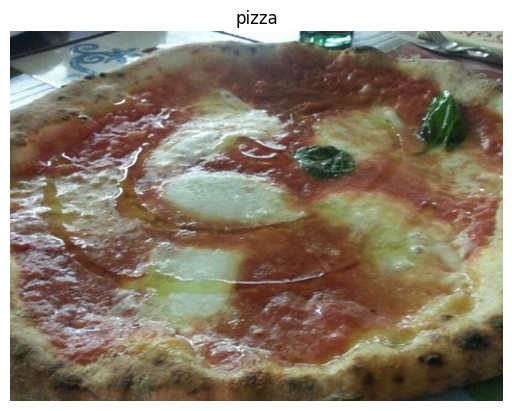

In [9]:
img= view_random_image(target_dir="pizza_steak/train/",
                  target_class= "pizza")

In [10]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(384, 512, 3), dtype=uint8, numpy=
array([[[130, 144, 144],
        [132, 146, 146],
        [131, 145, 145],
        ...,
        [169, 183, 160],
        [166, 180, 155],
        [163, 177, 151]],

       [[129, 143, 143],
        [129, 143, 143],
        [126, 140, 140],
        ...,
        [158, 170, 148],
        [162, 174, 150],
        [167, 180, 154]],

       [[121, 135, 135],
        [120, 134, 134],
        [119, 133, 133],
        ...,
        [170, 179, 158],
        [170, 180, 156],
        [170, 180, 155]],

       ...,

       [[ 87,  80,  61],
        [ 87,  80,  61],
        [ 85,  78,  59],
        ...,
        [ 28,  51,  25],
        [ 34,  54,  29],
        [ 32,  52,  27]],

       [[ 85,  79,  57],
        [ 87,  81,  59],
        [ 88,  82,  60],
        ...,
        [ 29,  51,  28],
        [ 35,  54,  32],
        [ 35,  54,  32]],

       [[ 81,  75,  53],
        [ 85,  79,  57],
        [ 91,  85,  63],
        ...,
        [ 30,  52,  2

In [11]:
img.shape # returns width, height, color channels

(384, 512, 3)

In [12]:
# Get all the pixel values between 0 and 1
img/255.

array([[[0.50980392, 0.56470588, 0.56470588],
        [0.51764706, 0.57254902, 0.57254902],
        [0.51372549, 0.56862745, 0.56862745],
        ...,
        [0.6627451 , 0.71764706, 0.62745098],
        [0.65098039, 0.70588235, 0.60784314],
        [0.63921569, 0.69411765, 0.59215686]],

       [[0.50588235, 0.56078431, 0.56078431],
        [0.50588235, 0.56078431, 0.56078431],
        [0.49411765, 0.54901961, 0.54901961],
        ...,
        [0.61960784, 0.66666667, 0.58039216],
        [0.63529412, 0.68235294, 0.58823529],
        [0.65490196, 0.70588235, 0.60392157]],

       [[0.4745098 , 0.52941176, 0.52941176],
        [0.47058824, 0.5254902 , 0.5254902 ],
        [0.46666667, 0.52156863, 0.52156863],
        ...,
        [0.66666667, 0.70196078, 0.61960784],
        [0.66666667, 0.70588235, 0.61176471],
        [0.66666667, 0.70588235, 0.60784314]],

       ...,

       [[0.34117647, 0.31372549, 0.23921569],
        [0.34117647, 0.31372549, 0.23921569],
        [0.33333333, 0

## An end-to-end example

Let's build a convolutional neural network to find patterns in our images, more specifically we need a way to:

* Load our images
* Preprocess our images
* Build a `CNN` to find patterns in our images
* Compile the CNN
* Fit the CNN

In [13]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess the data (get all of the pixel values between 0 & 1, also called normalization/scaling)
train_datagen = ImageDataGenerator(rescale= 1./255)
valid_datagen = ImageDataGenerator(rescale= 1./255)

# Setup path to our data directories
train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory= train_dir,
                                               batch_size= 32,
                                               target_size= (224, 224),
                                               class_mode= "binary",
                                               seed= 42)

valid_data = valid_datagen.flow_from_directory(directory= test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode= "binary",
                                               seed= 42)

# Build a CNN model (same as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224, 224, 3)),

    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])


# Compile our CNN
model_1.compile(loss= tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics= ["accuracy"])

# Train the data
history_1 = model_1.fit(train_data,
                        epochs= 5,
                        steps_per_epoch= len(train_data),
                        validation_data= valid_data,
                        validation_steps= len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 31s 262ms/step - loss: 0.6589 - accuracy: 0.6433 - val_loss: 0.5535 - val_accuracy: 0.6780
Epoch 2/5
47/47 [==============================] - 13s 274ms/step - loss: 0.4939 - accuracy: 0.7727 - val_loss: 0.4180 - val_accuracy: 0.8320
Epoch 3/5
47/47 [==============================] - 13s 275ms/step - loss: 0.4658 - accuracy: 0.7807 - val_loss: 0.4305 - val_accuracy: 0.7900
Epoch 4/5
47/47 [==============================] - 11s 239ms/step - loss: 0.4332 - accuracy: 0.8007 - val_loss: 0.3794 - val_accuracy: 0.8500
Epoch 5/5
47/47 [==============================] - 13s 268ms/step - loss: 0.3950 - accuracy: 0.8213 - val_loss: 0.3557 - val_accuracy: 0.8660


In [14]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

## Replicate model in the prvious section

In [15]:
# Set the random seed
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_2.compile(loss= tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics= ['accuracy'])

history_2 = model_2.fit(train_data,
                        epochs= 5,
                        steps_per_epoch= len(train_data),
                        validation_data= valid_data,
                        validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 12s 224ms/step - loss: 0.7493 - accuracy: 0.4987 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 12s 262ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 10s 214ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 10s 204ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 10s 223ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


In [16]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


In [17]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation= 'relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_3.compile(loss='binary_crossentropy',
                optimizer= tf.keras.optimizers.Adam(),
                metrics= ['accuracy'])


history_3 = model_3.fit(train_data,
                        epochs= 5,
                        steps_per_epoch= len(train_data),
                        validation_data= valid_data,
                        validation_steps= len(valid_data))

Epoch 1/5
47/47 [==============================] - 12s 224ms/step - loss: 3.3118 - accuracy: 0.6080 - val_loss: 0.7122 - val_accuracy: 0.7800
Epoch 2/5
47/47 [==============================] - 11s 225ms/step - loss: 0.9318 - accuracy: 0.6927 - val_loss: 0.8156 - val_accuracy: 0.6540
Epoch 3/5
47/47 [==============================] - 12s 262ms/step - loss: 0.6071 - accuracy: 0.7433 - val_loss: 0.6432 - val_accuracy: 0.7480
Epoch 4/5
47/47 [==============================] - 11s 225ms/step - loss: 0.5484 - accuracy: 0.7713 - val_loss: 0.4384 - val_accuracy: 0.7860
Epoch 5/5
47/47 [==============================] - 10s 220ms/step - loss: 0.5561 - accuracy: 0.7613 - val_loss: 0.5771 - val_accuracy: 0.7400


In [18]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


<Axes: >

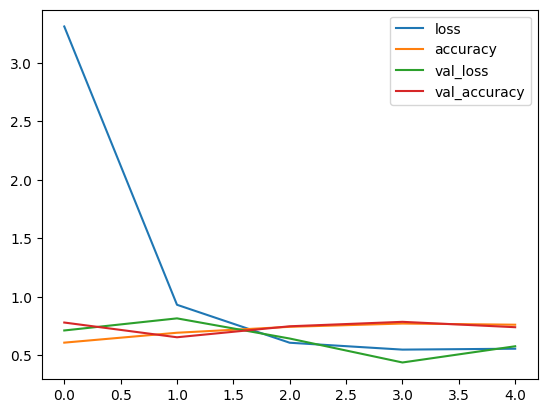

In [19]:
import pandas as pd
pd.DataFrame(history_3.history).plot(kind='line')

## Binary Classification: Let's break down the problem

1. Become one with the data
2. Preprocess the data
3. Created a model
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model
7. Repeat until satisfied

### Become one with data

['413325.jpg']
Image shape: (384, 512, 3)
['2312987.jpg']
Image shape: (512, 512, 3)


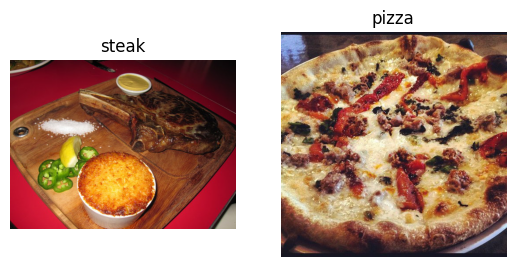

In [20]:
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image('pizza_steak/train/', 'steak')
plt.subplot(1, 2, 2)
pizza_img = view_random_image('pizza_steak/train/', 'pizza')

### Preprocess the data

In [21]:
# Define directory

train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

**Batch** is a small subset of data. Rather than looking all the images at a time

It does for following reason:
1. 10,000 images (or more) might not fit into the memory of the processor(GPU).
2. Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to learn very well


In [22]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [23]:
# Load in image data
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory =test_dir,
                                             target_size=(224, 224),
                                             class_mode='binary',
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [24]:
images, labels = train_data.next()
len(images), len(labels)

(32, 32)

In [25]:
images[0].shape

(224, 224, 3)

In [26]:
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

### Create a CNN model

In [27]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import MaxPool2D, Activation, Flatten, Dense, Conv2D
from tensorflow.keras import Sequential

In [28]:
model_4 = Sequential([
    Conv2D(filters = 10, # Number of sliding window (higher = more complex)
           kernel_size= 3, # The size of the sliding window
           strides =1, # The size of the step the sliding window
           padding ='valid', # if 'same', output shape remain same, if 'valid', output shape gets compressed
           activation='relu',
           input_shape=(224, 224, 3)),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    Flatten(),
    Dense(1, activation='sigmoid')
])

In [29]:
model_4.compile(loss= tf.keras.losses.BinaryCrossentropy(),
                optimizer= Adam(),
                metrics=["accuracy"])

In [30]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


In [31]:
# Check the length of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [32]:
history_4= model_4.fit(train_data,
                       epochs=5,
                       steps_per_epoch=len(train_data),
                       validation_data=test_data,
                       validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 14s 241ms/step - loss: 0.8026 - accuracy: 0.6927 - val_loss: 0.4287 - val_accuracy: 0.8080
Epoch 2/5
47/47 [==============================] - 11s 238ms/step - loss: 0.4150 - accuracy: 0.8100 - val_loss: 0.3988 - val_accuracy: 0.8300
Epoch 3/5
47/47 [==============================] - 11s 234ms/step - loss: 0.3419 - accuracy: 0.8627 - val_loss: 0.3553 - val_accuracy: 0.8360
Epoch 4/5
47/47 [==============================] - 11s 233ms/step - loss: 0.2196 - accuracy: 0.9240 - val_loss: 0.3736 - val_accuracy: 0.8420
Epoch 5/5
47/47 [==============================] - 11s 232ms/step - loss: 0.0961 - accuracy: 0.9720 - val_loss: 0.3876 - val_accuracy: 0.8320


<Axes: >

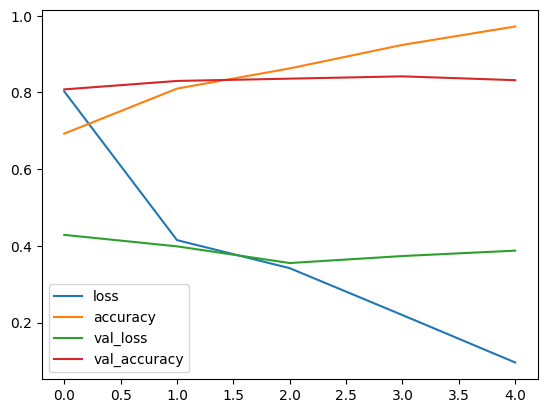

In [33]:
pd.DataFrame(history_4.history).plot(kind='line')

In [33]:
import matplotlib.pyplot as plt
def plot_history(history):
  """
  Returns history loss curves
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  plt.plot(epochs, loss, label= 'training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('epochs')
  plt.legend()


  plt.plot(epochs, accuracy, label= 'training_accuravy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('epochs')
  plt.legend()